# An IJulia Preview

This notebook is a preview demo of **IJulia**: a [Julia-language](http://julialang.org/) backend combined with the [IPython](http://ipython.org/) interactive environment.   This combination allows you to interact with the Julia language using IPython's powerful [graphical notebook](http://ipython.org/notebook.html), which combines code, formatted text, math, and multimedia in a single document.

* Note: this is a *preview*, because it relies on pre-release bleeding-edge versions of Julia, IPython, and several Julia packages, as explained on the [IJulia github page](https://github.com/JuliaLang/IJulia.jl), and functionality is evolving rapidly.  We hope to have a more polished release soon.

## Basic Julia interaction

Basic mathematical expressions work like you expect:

In [1]:
function f(x)
    y = x.^2;
    return y;
end
g = x -> x.^2

(::#1) (generic function with 1 method)

In [2]:
a = randn(3,3);
f(a) - g(a)

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [3]:
a[:]

9-element Array{Float64,1}:
 -0.26112 
 -1.22173 
  0.337164
 -1.41072 
 -0.368395
 -0.472308
  0.411427
 -1.60946 
 -0.137196

You can define variables, write loops, and execute arbitrary multiline code blocks.  Here is an example of an alternating harmonic series $\sum_{n=1}^\infty \frac{(-1)^n}{n}$ from a [Julia tutorial by Homer Reid](http://homerreid.ath.cx/teaching/18.330/JuliaProgramming.shtml#SimplePrograms):

In [4]:
s = 0.0
for n = 1:2:10000
    s += 1/n - 1/(n+1)
end
s # an expression on the last line (if it doesn't end with ";") is printed as "Out"

0.6930971830599458

Previous outputs can be referred to via `Out[`*n*`]`, following the IPython, for example `Out[2]` for the result above.  You can also use the shorthand `_2`, or `_` for the previous result, as in IPython.  Like in Matlab, `ans` can also be used to refer to the previous result, *even if it was not printed* (when the command ended with `;`).

For example, the harmonic series above should be converging (slowly) to $\ln 2$, and we can check this:

In [5]:
Out[2] - log(2)

3×3 Array{Float64,2}:
 -0.693147  -0.693147  -0.693147
 -0.693147  -0.693147  -0.693147
 -0.693147  -0.693147  -0.693147

Like Matlab or Scipy + Numpy, Julia has lots of mathematical functions and linear algebra built in.  For example, we can define a $500\times500$ random matrix $R$ and form the positive-definite matrix $R^* R$:

In [6]:
R = rand(500,500)
R' * R  + 1

500×500 Array{Float64,2}:
 168.059  133.334  126.666  123.144  …  120.416  127.723  127.33   125.626
 133.334  184.044  132.761  134.857     125.833  129.424  129.752  132.378
 126.666  132.761  169.95   129.903     121.587  129.969  127.314  122.971
 123.144  134.857  129.903  165.669     119.301  128.909  123.129  124.133
 124.958  125.936  123.389  123.695     116.835  125.323  118.102  122.092
 125.606  128.414  125.355  124.912  …  119.155  126.15   123.898  120.259
 124.857  132.309  125.604  123.341     121.31   124.498  124.141  125.517
 128.086  128.129  129.275  123.25      119.013  129.562  127.62   125.14 
 125.69   128.922  124.766  125.233     116.989  126.775  122.935  118.891
 125.159  132.154  129.099  124.196     123.894  125.764  128.139  123.698
 119.85   122.969  120.29   115.34   …  111.685  121.216  114.546  116.172
 126.87   130.163  128.855  122.857     120.912  124.233  131.261  121.85 
 124.215  130.578  126.594  121.72      118.905  127.143  121.654  126.218

(Notice that, by default, only a portion of a large matrix is shown.  You didn't really want to read $500^2 = 250,000$ numbers, did you?)

Standard output from Julia is also captured and sent to the IJulia notebook as you'd expect:

In [7]:
println("Hello world!\n")
println(STDERR, "Börk börk börk, some unicode output on stderr...\n")

Hello world!



Börk börk börk, some unicode output on stderr...



IJulia even captures output from external C libraries (and notice how easy it is using Julia's `ccall` intrinsic):

In [21]:
ccall(:printf, Cint, (Ptr{Uint8},), "Hello from C!!\n");

LoadError: UndefVarError: Uint8 not defined

We can define functions, of course, and use them in later input cells:

In [22]:
f(x) = x + 1

f (generic function with 1 method)

In [23]:
println(f(3))
f([1,1,2,3,5,8])

4


6-element Array{Int64,1}:
 2
 2
 3
 4
 6
 9

Notice that the input above both printed an scalar to `STDOUT` and also returned a vector, the latter using Julia's ability to write polymorphic functions and built-in array operations.

On the other hand adding a string to a number is not defined (there is no `+` method defined for those types, although we could easily add one), and attempting to do so will throw an exception:

In [11]:
f("Hello?")

LoadError: MethodError: no method matching +(::String, ::Int64)[0m
Closest candidates are:
  +(::Any, ::Any, [1m[31m::Any[0m, [1m[31m::Any...[0m) at operators.jl:138
  +([1m[31m::Complex{Bool}[0m, ::Real) at complex.jl:151
  +([1m[31m::Char[0m, ::Integer) at char.jl:40
  ...[0m

## Julia–Python interoperability: SciPy and Matplotlib

Julia can easily and transparently call external Python code using a package called [PyCall](https://github.com/stevengj/PyCall.jl), and to illustrate that capability we will show some examples calling [SciPy](http://www.scipy.org/) and [Matplotlib](http://matplotlib.org/) from Julia.

For example, we can use the [Newton solver in scipy.optimize](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) to solve a transcendental equation $\cos(x) - x = 0$ given a *Julia* function:

In [12]:
using PyCall
@pyimport scipy.optimize as so
so.newton(x -> cos(x) - x, 1)

LoadError: PyError (:PyImport_ImportModule) <type 'exceptions.ImportError'>
ImportError('No module named scipy.optimize',)


We can use the same `@pyimport` syntax to import Matplotlib (specifically, the `matplotlib.pyplot` module), but to integrate Matplotlib's graphics with the IJulia display requires a little more work.  To simplify this, we've created a [PyPlot module](https://github.com/stevengj/PyPlot.jl) for Julia:

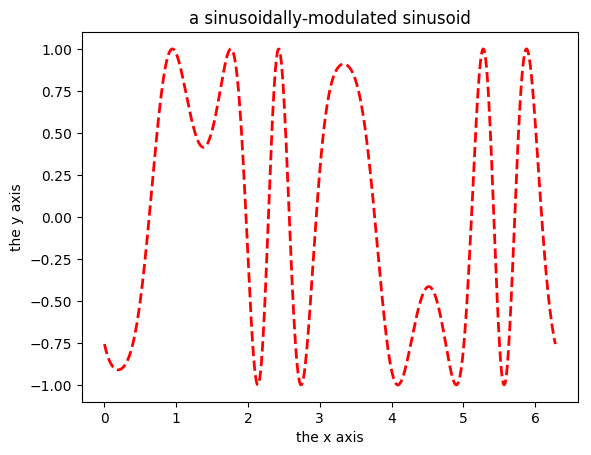

PyObject <matplotlib.text.Text object at 0x328599a90>

In [13]:
using PyPlot
x = linspace(0,2*pi,1000)
y = sin(3*x + 4*cos(2*x))
plot(x, y, color="red", linewidth=2.0, linestyle="--")
ylabel("the y axis")
xlabel("the x axis")
title("a sinusoidally-modulated sinusoid")

In [14]:
g = imread("nt_toolbox/data/hibiscus.bmp");

LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u"Only know how to handle extensions: [u'png']; with Pillow installed matplotlib can handle more images",)
  File "/Users/gpeyre/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/pyplot.py", line 2314, in imread
    return _imread(*args, **kwargs)
  File "/Users/gpeyre/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/image.py", line 1282, in imread
    'more images' % list(six.iterkeys(handlers)))


In [15]:
imshow(g, interpolation="nearest")
set_cmap("gray")
axis("off")

LoadError: PyError (:PyObject_Call) <type 'exceptions.TypeError'>
TypeError(u'Image data can not convert to float',)
  File "/Users/gpeyre/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3157, in imshow
    **kwargs)
  File "/Users/gpeyre/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/__init__.py", line 1898, in inner
    return func(ax, *args, **kwargs)
  File "/Users/gpeyre/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 5124, in imshow
    im.set_data(X)
  File "/Users/gpeyre/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/image.py", line 596, in set_data
    raise TypeError("Image data can not convert to float")


In [16]:
include("nt_toolbox/nt_signal.jl")
using nt_signal
imageplot(g)

LoadError: MethodError: no method matching size(::##1#2, ::Int64)[0m
Closest candidates are:
  size{N}(::Any, ::Integer, [1m[31m::Integer[0m, [1m[31m::Integer...[0m) at abstractarray.jl:48
  size([1m[31m::BitArray{1}[0m, ::Any) at bitarray.jl:43
  size([1m[31m::Char[0m, ::Any) at char.jl:14
  ...[0m

Notice that, by default, the plots are displayed inline (just as for the `%pylab inline` "magic" in IPython).  This kind of multimedia display can be enabled for *any* Julia object, as explained in the next section.

## Multimedia display in IJulia

Like most programming languages, Julia has a built-in `print(x)` function for outputting an object `x` as text, and you can override the resulting text representation of a user-defined type by overloading Julia's `show` function.  The next version of Julia, however, will extend this to a more general mechanism to display **arbitrary multimedia representations** of objects, as defined by standard [MIME types](https://en.wikipedia.org/wiki/Internet_media_type).   More specifically, the Julia [multimedia I/O API](http://docs.julialang.org/en/latest/stdlib/base/#multimedia-i-o) provides:

* A `display(x)` function requests the richest available multimedia display of a Julia object x (with a `text/plain` fallback).
* Overloading `writemime` allows one to indicate arbitrary multimedia representations (keyed by standard MIME types) of user-defined types.
* Multimedia-capable display backends may be registered by subclassing a generic `Display` type.  IJulia provides one such backend which, thanks to the IPython notebook, is capable of displaying HTML, LaTeX, SVG, PNG, and JPEG media formats.

The last two points are critical, because they separate **multimedia export** (which is defined by functions associated with the originating Julia data) from **multimedia display** (defined by backends which know nothing about the source of the data).

Precisely these mechanism were used to create the inline PyPlot plots above.   To start with, the simplest thing is to provide the MIME type of the data when you call `display`, which allows you to pass "raw" data in the corresponding format:

In [17]:
display("text/html", """Hello <b>world</b> in <font color="red">HTML</font>!""")

Hello world in HTML !

However, it will be more common to attach this information to types, so that they display correctly automatically.  For example, let's define a simple `HTML` type in Julia that contains a string and automatically displays as HTML (given an HTML-capable backend such as IJulia):

In [18]:
type HTML
   s::String
end
import Base.writemime
writemime(io::IO, ::@MIME("text/html"), x::HTML) = print(io, x.s)

LoadError: UndefVarError: @MIME not defined

Here, `writemime` is just a function that writes `x` in the corresponding format (`text/html`) to the I/O stream `io`.  The `@MIME` is a bit of magic to allow Julia's [multiple dispatch](http://en.wikipedia.org/wiki/Multiple_dispatch) to automatically select the correct `writemime` function for a given MIME type (here `"text/html"`) and object type (here `HTML`).  We also needed an `import` statement in order to add new methods to an existing function from another module.

This `writemime` definition is all that we need to make any object of type `HTML` display automatically as HTML text in IJulia:

In [19]:
x = HTML("<ul> <li> Hello from a bulleted list! </ul>")

HTML("<ul> <li> Hello from a bulleted list! </ul>")

In [20]:
display(x)
println(x)

HTML("<ul> <li> Hello from a bulleted list! </ul>")

HTML("<ul> <li> Hello from a bulleted list! </ul>")


Once this functionality becomes available in a Julia release, we expect that many Julia modules will provide rich representations of their objects for display in IJulia, and moreover that other backends will appear.  Not only can other backends (such as Tim Holy's [ImageView](https://github.com/timholy/ImageView.jl) package) provide more full-featured display of images etcetera than IJulia's inline graphics, but they can also add support for displaying MIME types not handled by the IPython notebook (such as video or audio).